<a href="https://colab.research.google.com/github/NguyenVanHien8502/image-classification/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import tensorflow as tf
from tensorflow import keras
from keras.api._v2.keras import layers

print(f"Tensorflow: {tf.__version__}")
# print(f"\nKeras: {keras.__version__}")

Tensorflow: 2.13.0


In [181]:
import matplotlib.pyplot as plt
import numpy as np
import random

#1. Load data

In [182]:
(X_train, y_train), (X_test, y_test)=keras.datasets.fashion_mnist.load_data()

In [183]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [184]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [185]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [186]:
X_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [187]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]
class_nums = len(class_names)
print(class_nums)

10


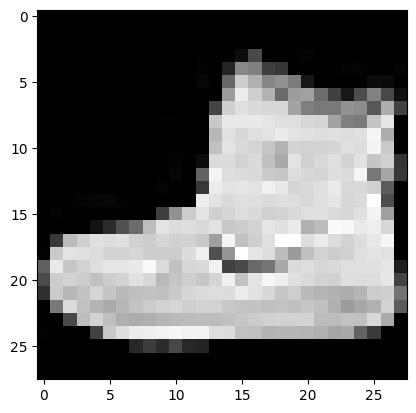

In [188]:
plt.imshow(X_train[0], cmap="gray")

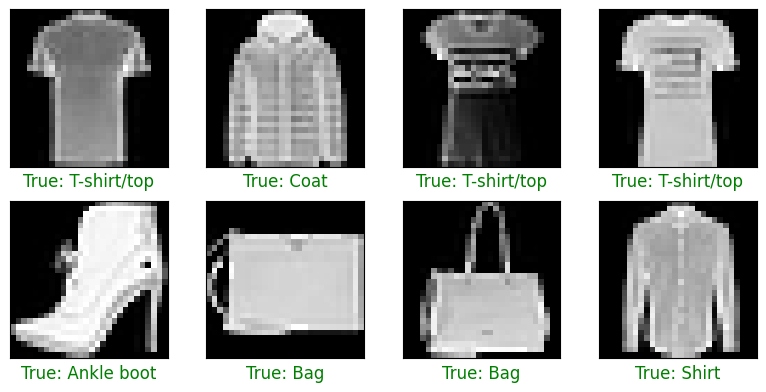

In [216]:
from typing import Optional
def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray]=None) ->None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))

  len_x=x_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]
    img_idx = random.randint(0, len_x)
    ax.imshow(x_data[img_idx], cmap='gray')
    color = 'green'
    ax.set(xticks=[], yticks=[])

    true_label_str = f"True: {class_names[y_data[img_idx]]}"

    if y_proba is not None:
      predicted_idx = np.argmax(y_proba[img_idx])
      predicted_label = class_names[predicted_idx]
      color = 'red' if predicted_idx != y_data[img_idx] else color
      predicted_label_str = f"\nPredicted: {predicted_label}"

    img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
    ax.set_xlabel(img_title, color=color, fontsize=12)

  plt.tight_layout()
  plt.show()
plot_data(X_train, y_train)

#2. Image pre-processing

In [190]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [191]:
X_train.dtype, X_train.shape

(dtype('float32'), (60000, 28, 28))

In [192]:
X_test.dtype, X_test.shape

(dtype('float32'), (10000, 28, 28))

In [193]:
X_train = np.expand_dims(X_train, axis=-1)

In [194]:
X_train.shape

(60000, 28, 28, 1)

In [195]:
X_test = np.expand_dims(X_test, axis=-1)

In [196]:
X_test.shape

(10000, 28, 28, 1)

In [197]:
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [198]:
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

###3. Network Architecure (ANN)

In [199]:
input_shape = (28,28,1)

In [200]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape), # (28,28,1)-> 1 dimension (28*28)
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(class_nums, activation = 'softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [201]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [202]:
epochs = 10
batch_size = 256
#chạy 10 epochs, mỗi epochs có 422 batch
history = model.fit(X_train, y_train_label,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1)

Epoch 1/10
211/211 [==============================] - 8s 35ms/step - loss: 0.6313 - accuracy: 0.7710 - val_loss: 0.4535 - val_accuracy: 0.8360
Epoch 2/10
211/211 [==============================] - 5s 25ms/step - loss: 0.4177 - accuracy: 0.8461 - val_loss: 0.4189 - val_accuracy: 0.8418
Epoch 3/10
211/211 [==============================] - 4s 21ms/step - loss: 0.3637 - accuracy: 0.8645 - val_loss: 0.3523 - val_accuracy: 0.8708
Epoch 4/10
211/211 [==============================] - 6s 27ms/step - loss: 0.3275 - accuracy: 0.8777 - val_loss: 0.3726 - val_accuracy: 0.8653
Epoch 5/10
211/211 [==============================] - 4s 20ms/step - loss: 0.3085 - accuracy: 0.8844 - val_loss: 0.3205 - val_accuracy: 0.8808
Epoch 6/10
211/211 [==============================] - 4s 20ms/step - loss: 0.2882 - accuracy: 0.8915 - val_loss: 0.3293 - val_accuracy: 0.8822
Epoch 7/10
211/211 [==============================] - 5s 26ms/step - loss: 0.2726 - accuracy: 0.8963 - val_loss: 0.3417 - val_accuracy: 0.8713

In [203]:
history_dict = history.history

In [204]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [205]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

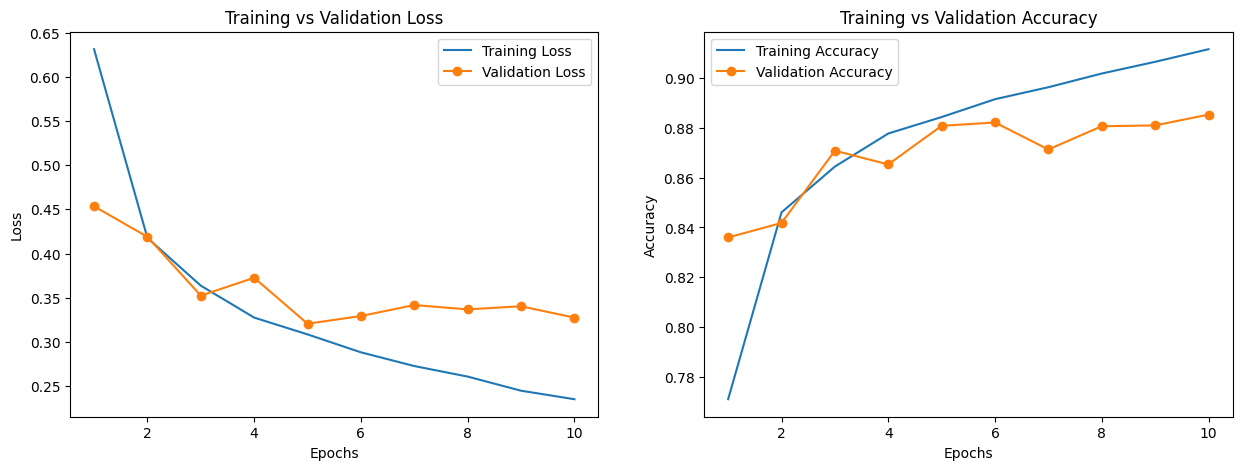

In [206]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label='Training Loss')
ax1.plot(epoch_runs, val_loss, label='Validation Loss', marker = 'o')
ax1.set(title='Training vs Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label='Training Accuracy')
ax2.plot(epoch_runs, val_acc, label='Validation Accuracy', marker = 'o')
ax2.set(title='Training vs Validation Accuracy', xlabel='Epochs', ylabel='Accuracy')
ax2.legend()

plt.show()

#4. Model Evaluate

In [207]:
score = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 1s 4ms/step - loss: 0.3390 - accuracy: 0.8864


In [208]:
print(f"Test Loss: {score[0]: .4f}")
print(f"Test Accuracy: {score[1]: .4f}")

Test Loss:  0.3390
Test Accuracy:  0.8864


#5. Prediction

In [209]:
X_sample = X_test[:3]
y_proba = model.predict(X_sample)

1/1 [==============================] - 0s 70ms/step


In [210]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   ,
        0.986],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [211]:
predictions = np.argmax(y_proba, axis=1)
# [[0.1, 0.3, 0.5, 0.1],  # Mẫu 1 (Dòng 0)
#  [0.2, 0.2, 0.2, 0.4],  # Mẫu 2 (Dòng 1)
#  [0.7, 0.1, 0.1, 0.1]]  # Mẫu 3 (Dòng 2)

# axis=0 sẽ nghĩa là bạn muốn tìm giá trị lớn nhất trong từng cột (theo các mẫu dữ liệu).
# axis=1 sẽ nghĩa là bạn muốn tìm giá trị lớn nhất trong từng hàng (theo các lớp).

In [214]:
[class_names[pred] for pred in predictions]

['Ankle boot', 'Pullover', 'Trouser']

In [217]:
y_proba_full = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


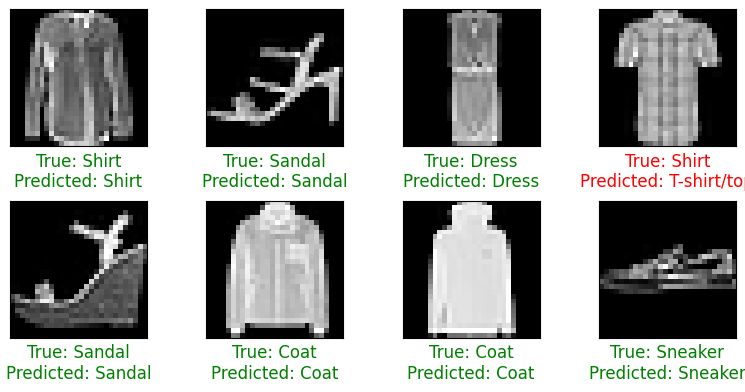

In [222]:
plot_data(X_test, y_test, y_proba_full)